# Data Analysis

In [ ]:
import warnings; warnings.filterwarnings('ignore')

# Load packages
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
#import time
from subprocess import check_output

In [ ]:
data = pd.read_csv('water_is_safe.csv')

Analysing Water Quality dataset which has features like metals, minerals and bacteria and viruses. The data is sparse with 20 features and one response variable. If there are impurities beyond a particular limit, the output variable is ‘1’ and if it doesn’t have impurities above a level, the output variable is ‘0’.  There are no unnecessary columns in the below data frame. 

Before making anything like feature selection,feature extraction and classification, firstly we start with basic data analysis. 


In [ ]:
data.head()  # head method show only first 5 rows

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [ ]:
# Feature names as a list
col = data.columns # .columns gives columns names in data 
print(col)

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'is_safe'],
      dtype='object')


In [ ]:
data.describe()

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,0.666158,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,0.328583,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673
std,1.265145,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,0.378096,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,0.002000,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000
50%,0.070000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,0.008000,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000
75%,0.280000,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,0.700000,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000
max,5.050000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

Data Cleaning & Imputation- The Water Quality dataset dimensions are 6999 rows and 21 columns. It is observed that there are 3 rows with the string ‘#NUM!’. So rather than imputing the values, we drop the rows which contain this string.

In [ ]:
data = data[data != '#NUM!']

In [ ]:
print(data['ammonia'].isin(['#NUM!']))

0       False
1       False
2       False
3       False
4       False
        ...  
7994    False
7995    False
7996    False
7997    False
7998    False
Name: ammonia, Length: 7999, dtype: bool


In [ ]:
if any('#NUM!' in i for i in data):
   print("present")
else :
   print("Not present")

Not present


In [ ]:
data = data.dropna()

In [ ]:
data["ammonia"] = data["ammonia"].astype("float")

In [ ]:
data.shape

(7996, 21)

In [ ]:
# y includes our labels and x includes our features
y = data.is_safe # 1 or 0 
list = ['is_safe']
x = data.drop(list,axis = 1 )
x

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,0.000,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,0.650,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,0.003,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,0.710,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,0.001,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,0.000,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,0.000,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,0.000,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05
7997,0.01,10.00,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,0.000,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00


Now, we are left with 7996 rows after data cleaning. Let’s see how the classes are spread out in the given dataset.

# `Class Distribution`

Class Distribution- From the below countplot, we can see that there are 912 instances where the water is having impurities and 7084 instances where the water doesn’t have any impurities.


0    7084
1     912
Name: is_safe, dtype: int64

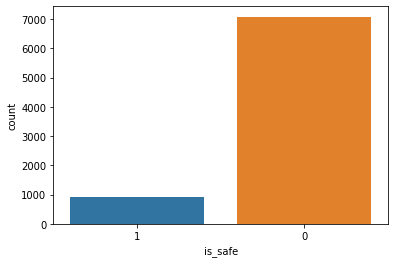

In [ ]:
ax = sns.countplot(y,label="Count")
y.value_counts()

Density Check for Normalization-  The objective is to change the upsides of numeric sections in the dataset to a typical scale, without misshaping contrasts in the scopes of qualities. Looking at the density plot for the features (Fig.3), we can see that there is a lot of density from 0-7 points range. So, we try to normalize the input features to evenly spread the data out.

Let us examine the feature statistics to understand need for any normalization and such.

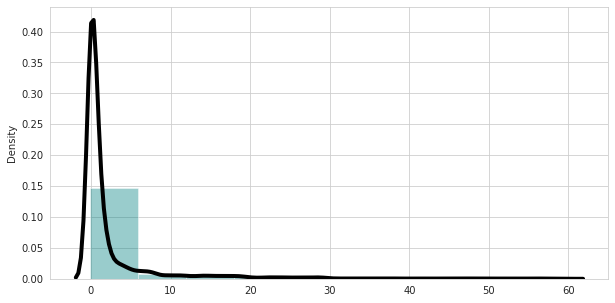

In [ ]:
import seaborn as sns
sns.set_style("whitegrid")  # Setting style(Optional)
plt.figure(figsize = (10,5)) #Specify the size of figure we want(Optional)
sns.distplot(x = x  ,  bins = 10 , kde = True , color = 'teal'\
             , kde_kws=dict(linewidth = 4 , color = 'black'))
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x = sc.fit_transform(x)

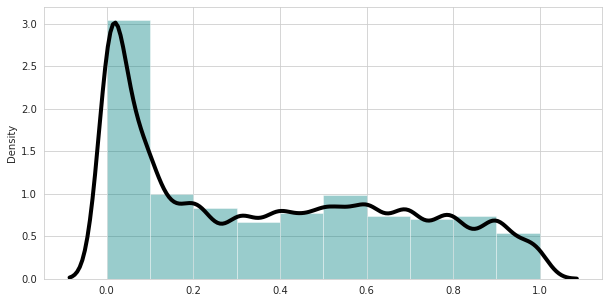

In [ ]:

sns.set_style("whitegrid")  # Setting style(Optional)
plt.figure(figsize = (10,5)) #Specify the size of figure we want(Optional)
sns.distplot(x = x  ,  bins = 10 , kde = True , color = 'teal'\
             , kde_kws=dict(linewidth = 4 , color = 'black'))
plt.show()

After normalization using a “MinMax Scaler”, the input features are spread out evenly. We can see that in Fig.3.b, the data now ranges between 0-1.

# Visualization: Univariate & Pair-Wise Plots, Correlation Map 
In order to visualizate data we are going to use seaborn plots. 

In [ ]:
x = pd.DataFrame(x, columns= col[0:20])

A violin plot depicts distributions of numeric data for one or more groups using density curves. The width of each curve corresponds with the approximate frequency of data points in each region. The peaks, valleys, and tails of each group’s density curve can be compared to see where groups are similar or different. 

In [ ]:
# Violin plot

#data_n_2 = (data - data.mean()) / (data.std()) # standardization
data = pd.concat([y,x],axis=1)

In [ ]:
data = data.dropna()

In [ ]:
data = pd.melt(data, id_vars =['is_safe'], 
               value_vars = ['aluminium', 'ammonia', 'arsenic', 'bacteria', 'barium', 'cadmium', 'chloramine', 'chromium', 'copper', 'flouride', 'lead', 'mercury', 'nitrates', 'nitrites', 'perchlorate', 'radium', 'selenium', 'silver', 'uranium', 'viruses'], 
               var_name="features",
               value_name='value')


In [ ]:
data['value'] = data['value'].astype('float')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

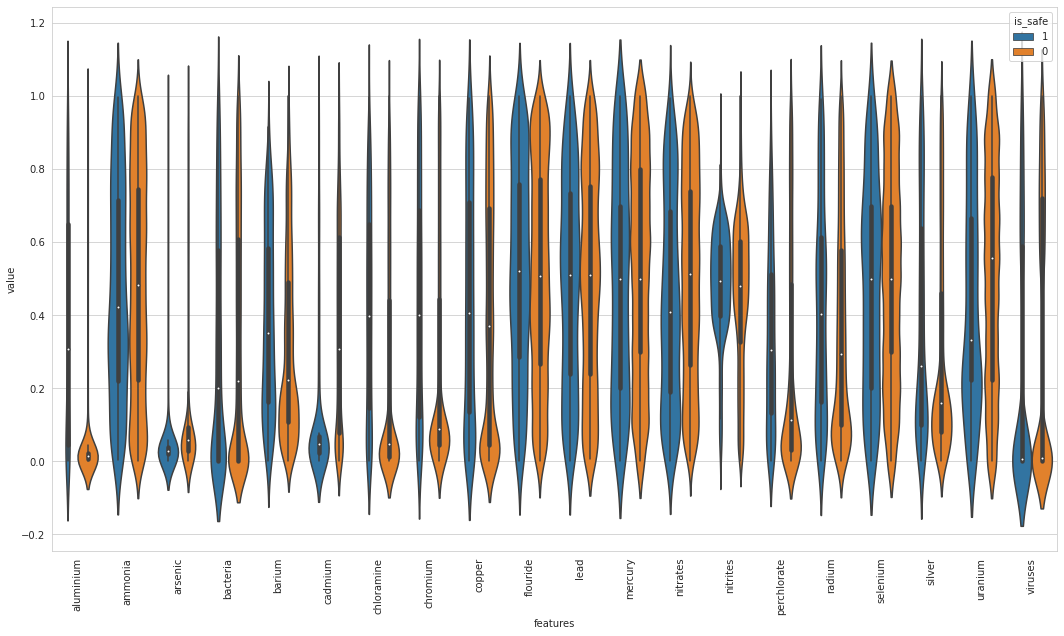

In [ ]:
plt.figure(figsize=(18,10))
sns.violinplot(x="features", y="value", hue="is_safe", data=data)
plt.xticks(rotation=90)

For aluminum, barium, cadmium, chloramine, chromium, perchlorate, radium and uranium the median of both the classes seems to be well-separated. This means these features are good for classification.

For fluoride, mercury, nitrites, viruses and selenium, the medians are almost the same. So, they prove to be not good for classification of both classes.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

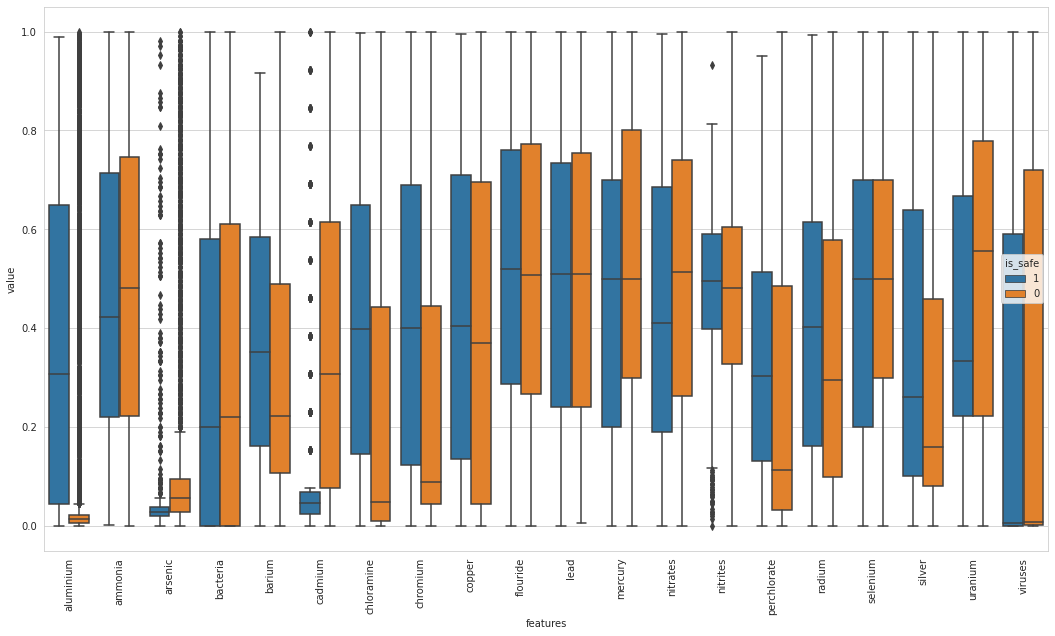

In [ ]:
# As an alternative of violin plot, box plot can be used
plt.figure(figsize=(18,10))
sns.boxplot(x="features", y="value", hue="is_safe", data=data)
plt.xticks(rotation=90)

We can see the same results obtained from the Violin plot. We can observe that perchlorate and chloramine have very similar distributions. So, we use a joint plot with a regression line to understand the correlation.


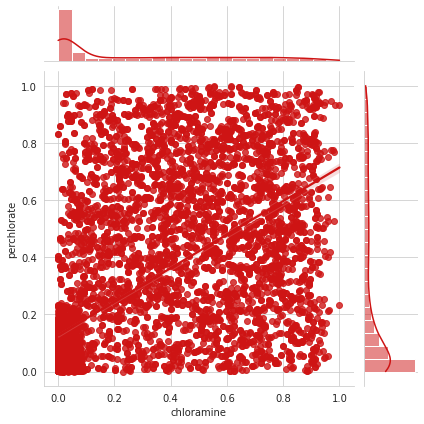

In [ ]:
sns.jointplot(x.loc[:,'chloramine'], x.loc[:,'perchlorate'], kind="reg", color="#ce1414")
#scatter', 'hist', 'hex', 'kde', 'reg', 'resid

The joint plot can be depicted that both the features- perchlorate and chloramine are highly correlated.

It is also observed that silver, chloramine, and chromium are also correlated with each other. We use pair grid plot from Seaborn module to plot the same.

Pairwise Plot- It is also observed that silver, chloramine, and chromium are also correlated with each other. We use pair grid plot from Seaborn module to plot the same.

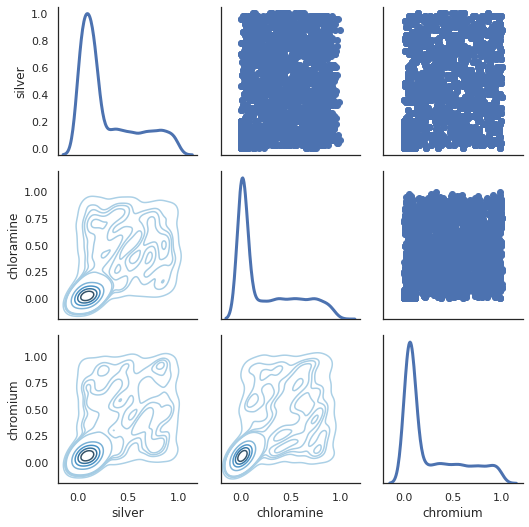

In [ ]:
sns.set(style="white")
df = x.loc[:,['silver','chloramine','chromium']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

We could observe that the correlation between each of the features is true. It can also be understood that the correlation is more towards 0-0.25 range as most of the data has classes with minimum impurities.

Correlation Heat Map- The correlation heat map gives us the numbers by which the features are correlated – making it one of the easiest approaches to understanding the data correlation. The grid locations where the color is more of orange to white represents positive correlation and negative correlation from pink to purple.

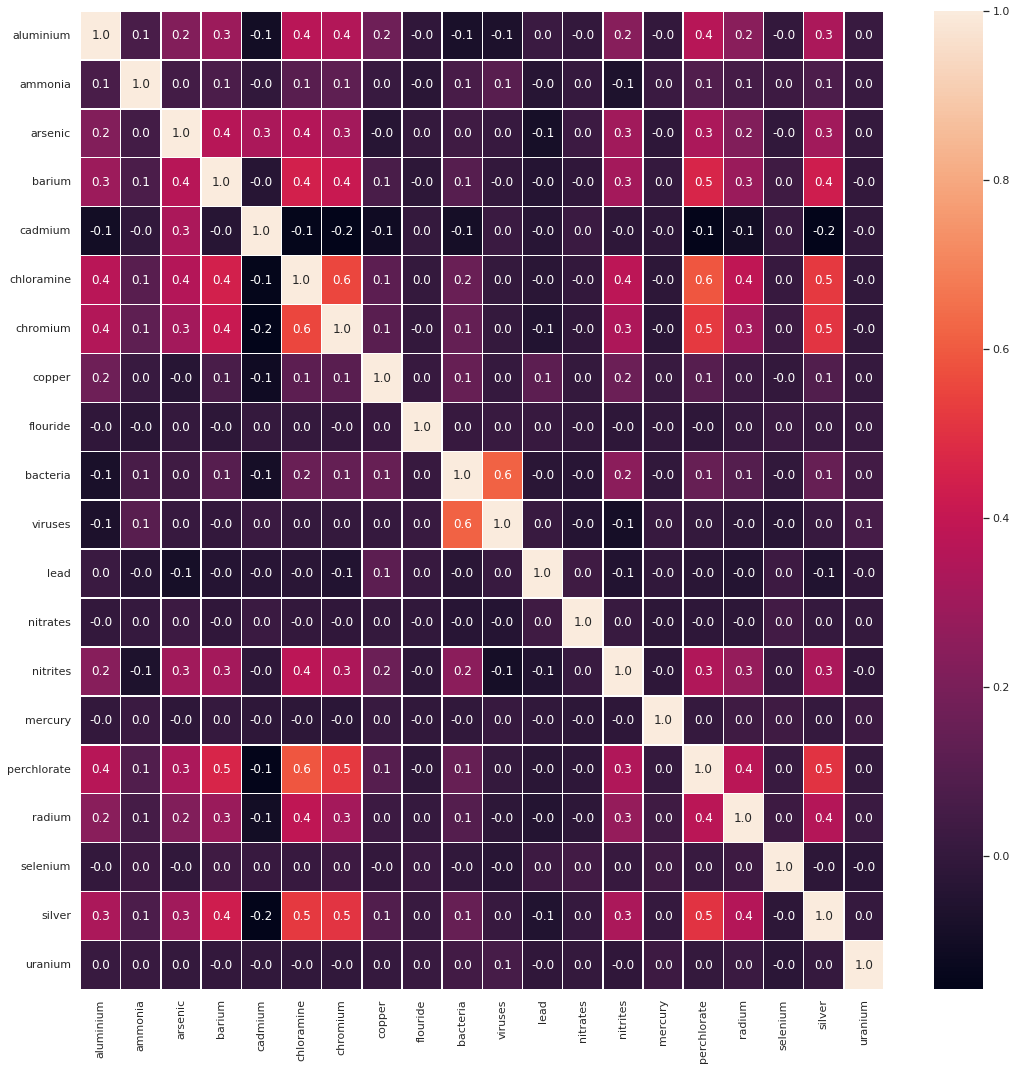

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

We can observe that perchlorate is correlated with silver, chloramine, barium, and chromium. Bacteria and viruses also demonstrate high correlation. Chloramine and chromium are also highly correlated. There is no considerable correlation between other features.

## Visualizing High-Dimensional Data using PCA, *t*-SNE & UMAP

In [ ]:
pip install umap-learn[plot]

Explained variation per principal component: [0.19035976 0.1220629  0.07044926 0.05534576]
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 7996 samples in 0.002s...
[t-SNE] Computed neighbors for 7996 samples in 2.112s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7996
[t-SNE] Computed conditional probabilities for sample 2000 / 7996
[t-SNE] Computed conditional probabilities for sample 3000 / 7996
[t-SNE] Computed conditional probabilities for sample 4000 / 7996
[t-SNE] Computed conditional probabilities for sample 5000 / 7996
[t-SNE] Computed conditional probabilities for sample 6000 / 7996
[t-SNE] Computed conditional probabilities for sample 7000 / 7996
[t-SNE] Computed conditional probabilities for sample 7996 / 7996
[t-SNE] Mean sigma: 0.398827
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.049690
[t-SNE] KL divergence after 300 iterations: 3.145922


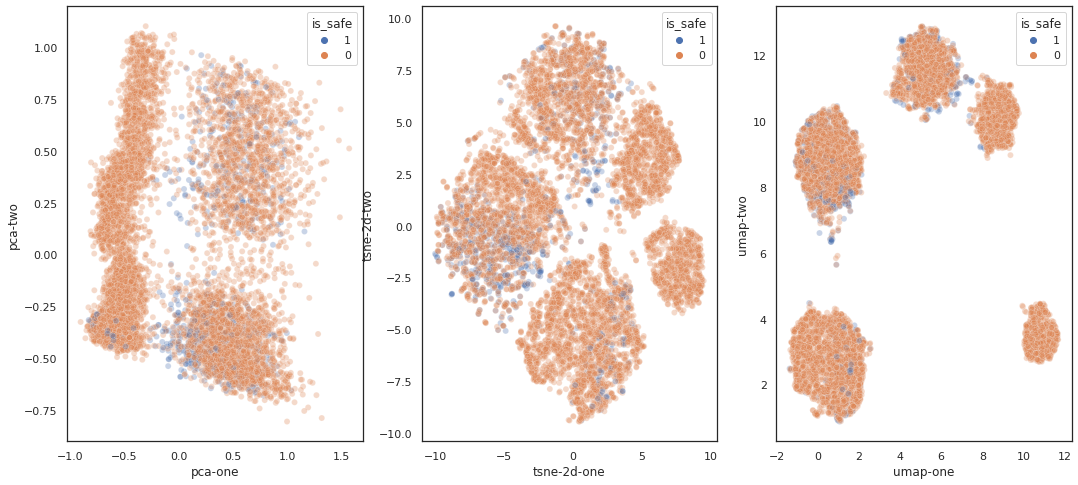

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

# PCA
pca = PCA(n_components=4)
pca_result = pca.fit_transform(x)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
df['pca-one'] = pca_result[:,0]; df['pca-two'] = pca_result[:,1]

# UMAP 
# umap_results = umap.UMAP(n_neighbors=5,min_dist=0.3,metric='correlation').fit_transform(x)
umap_results = umap.UMAP().fit_transform(x)
df['umap-one'] = umap_results[:,0]; df['umap-two'] = umap_results[:,1]

# t-SNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(x)
df['tsne-2d-one'] = tsne_results[:,0]; df['tsne-2d-two'] = tsne_results[:,1]

# Plot Visualizations
plt.figure(figsize=(18,8))
ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(x="pca-one", y="pca-two",hue=y,data=df,legend="full",alpha=0.3,ax=ax1)
ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two",hue=y,data=df,legend="full",alpha=0.3,ax=ax2)
ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(x="umap-one", y="umap-two",hue=y,data=df,legend="full",alpha=0.3,ax=ax3)

We can obviously see the class imbalance from the below PCA, t-SNE and UMAP plots. Usually, these plots help us understand the variations of the features by reducing the dimensions. In teh above result, we can see that there is not much information on how the classes are separated or what separates them. 

# Feature Selection
With fewer features, the output model becomes simpler and easier to interpret, and it becomes more likely for a human to trust future predictions made by the model.

In this part we will select features using different methods and `scikit learn` package:
- Univariate feature selection: F-Test, Chi-Square Test, Mutual Information
- Recursive feature elimination with cross validation (RFECV): Implements model-based feature selection and optimizes number of selected features

## Baseline MLP Model with All Features

First, we construct a basic Multi-Layer Perceptron model, to have a baseline performance measures and for the sake of hyper-parameter optimization. To achieve this “GridSearchCV” is used with a MLP Classifier

In [ ]:
import warnings; warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Specify Classifier
mlp = MLPClassifier(max_iter=100)

# Hyper-parameter space to optimize MLP
parameter_space = {
    'hidden_layer_sizes': [(8,4), (24,12), (48,24), (96,48)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05, 0.1],
    'learning_rate': ['constant','adaptive'],
}

# Note: the max_iter=100 that you defined on the initializer is not in the grid. 
# So, that number will be constant, while the ones in the grid will be searched.

# Run Search
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

# Note: the parameter n_jobs is to define how many CPU cores from your computer to use 
# (-1 is for all the cores available). The cv is the number of splits for cross-validation.

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05, 0.1],
                         'hidden_layer_sizes': [(8, 4), (24, 12), (48, 24),
                                                (96, 48)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [ ]:
# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.890 (+/-0.000) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (8, 4), 'learning_rate': 'constant', 'solver': 'sgd'}
0.916 (+/-0.007) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (8, 4), 'learning_rate': 'constant', 'solver': 'adam'}
0.890 (+/-0.000) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (8, 4), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.928 (+/-0.005) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (8, 4), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.893 (+/-0.008) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (24, 12), 'learning_rate': 'constant', 'solver': 'sgd'}
0.933 (+/-0.010) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (24, 12), 'learning_rate': 'constant', 'solver': 'adam'}
0.890 (+/-0.003) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (24, 12), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.931 (+/-0.005) for {'activatio

We can observe that after hyper-parameter optimization, below are the best parameters

In [ ]:
# Best parameter set
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (96, 48), 'learning_rate': 'constant', 'solver': 'adam'}


Below is the classification report for the model. Accuracy is 95% and F1-score for class-0 is 0.97 and 0.78 for class-1. This is not considered the best result though the Precision and accuracy are good. So, we also look at other options since this is an example of class imbalance and we need to get the best F1-score for class.

In [ ]:
# Now you can use the clf to make new predictions. 
# For example, check the performance on your test set.    
y_true, y_pred = y_test , clf.predict(X_test)

# Confustion Matrix
from sklearn.metrics import f1_score,confusion_matrix
cm = confusion_matrix(y_true,y_pred)
print('Confusion Matrix:\n', cm, '\n')
#sns.heatmap(cm,annot=True,fmt="d", annot_kws={"size": 12}) # font size

# Classification Report
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Confusion Matrix:
 [[1733   16]
 [  80  170]] 

Results on the test set:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1749
           1       0.91      0.68      0.78       250

    accuracy                           0.95      1999
   macro avg       0.93      0.84      0.88      1999
weighted avg       0.95      0.95      0.95      1999



## Univariate Feature Selection: F-Test, Chi-Square Test & Mutual Information

Univariate feature selection works by selecting the best features based on univariate statistical tests. 
`SelectKBest` removes all but the `K` highest scoring features.

**It is important that we optimize `K` in using `SelectKBest` procedure.** 

Alternatively, `SelectPercentile` removes all but a user-specified highest scoring percentage of features using common univariate statistical tests for each feature: false positive rate `SelectFpr`, false discovery rate `SelectFdr`, or family wise error `SelectFwe`. For more details, see __[documentation](https://scikit-learn.org/stable/modules/feature_selection.html)__.

F-Test Feature Scores List: 
 [1.00000000e+00 4.18633373e-03 1.23093917e-01 6.63047992e-02
 5.58797470e-01 2.87694739e-01 2.73839738e-01 6.93727053e-03
 3.41780485e-04 3.88438765e-03 7.57220583e-02 7.91796914e-04
 4.16249354e-02 1.76243237e-02 1.08117496e-02 4.59526564e-02
 3.35295152e-02 7.62427172e-03 8.50988052e-02 4.58104865e-02]
Feature List: 
 Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium'],
      dtype='object') 

Chi-Square Test Feature Scores List: 
 [1.00000000e+00 1.81654881e-03 1.07953599e-01 2.97100550e-02
 2.88511562e-01 2.29050921e-01 2.06154125e-01 4.34586972e-03
 1.32441765e-04 3.11913133e-03 7.71847828e-02 3.18696590e-04
 1.54525601e-02 3.50901587e-03 4.33092715e-03 3.42294663e-02
 1.82669147e-02 3.00284143e-03 5.55561250e-02 1.94032038e-02]
Feature List: 
 Index(

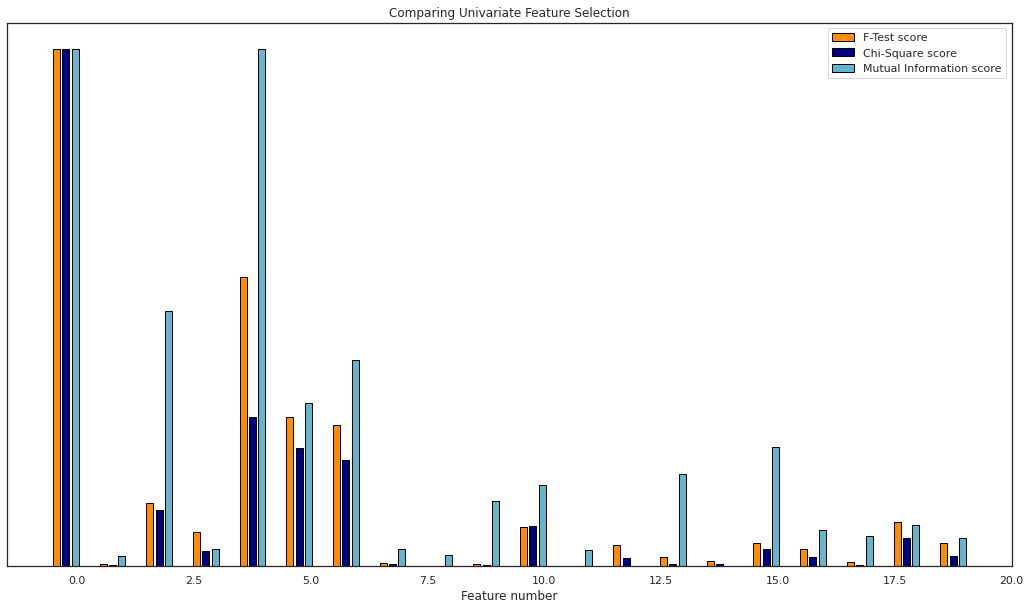

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

# ---------------------------------------------------------------------------
# We should be selecting features using TRAINING Dataset and NOT FULL Dataset - Fix This
# ---------------------------------------------------------------------------

# Get ready to plot scores from Univariate Feature Selection Methods
plt.figure(figsize=(18,10)); plt.clf()
x_indices = np.arange(x.shape[-1])

# SelectKBest Features using F-Test
x_new_f = SelectKBest(f_classif, k=6)
x_new_f.fit_transform(x, y)
#scores = x_new_f.pvalues_
#scores = -np.log10(x_new_f.pvalues_)
scores = x_new_f.scores_
scores /= scores.max()
plt.bar(x_indices - .45, scores, width=.15,
        label='F-Test score', color='darkorange',
        edgecolor='black')

# Print Selected Features
print('F-Test Feature Scores List: \n', x_new_f.scores_)
print('Feature List: \n', x.columns, '\n')

# SelectKBest Features using Chi-Square Test
x_new_chi2 = SelectKBest(chi2, k=6)
x_new_chi2.fit_transform(x, y)
#scores = x_new_chi2.pvalues_
#scores = -np.log10(x_new_chi2.pvalues_)
scores = x_new_chi2.scores_
scores /= scores.max()
plt.bar(x_indices - .25, scores, width=.15,
        label='Chi-Square score', color='navy',
        edgecolor='black')

# Print Selected Features
print('Chi-Square Test Feature Scores List: \n', x_new_chi2.scores_)
print('Feature List: \n', x.columns, '\n')

# SelectKBest Features using Mutual Information
x_new_mi = SelectKBest(mutual_info_classif, k=6)
x_new_mi.fit_transform(x, y)
scores = x_new_mi.scores_
scores /= scores.max()
plt.bar(x_indices - .05, scores, width=.15,
        label='Mutual Information score', color='c',
        edgecolor='black')

# Print Selected Features
print('Mutual Information Feature Scores List: \n', x_new_mi.scores_)
print('Feature List: \n', x.columns, '\n')

# Finish Plotting
plt.title("Comparing Univariate Feature Selection")
plt.xlabel('Feature number')
plt.yticks(())
plt.axis('tight')
plt.legend(loc='upper right')
plt.show()

# Re-Run to Get Datasets
x_new_f = SelectKBest(f_classif, k=6).fit_transform(x, y)
x_new_chi2 = SelectKBest(chi2, k=6).fit_transform(x, y)
x_new_mi = SelectKBest(mutual_info_classif, k=6).fit_transform(x, y)

The above figure shows the scores of different feature selection method for each feature spread out on the x-axis. We can see that for few features the scores are very considerable and for few features, the score is very bad.

### Univariate Feature Selection: F-Test

In [ ]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(x_new_f, y, test_size=0.25, random_state=42)

# Specify Classifier
mlp = MLPClassifier(max_iter=100)

# Hyper-parameter space to optimize MLP
parameter_space = {
    'hidden_layer_sizes': [(8,4), (24,12), (48,24), (96,48)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05, 0.1],
    'learning_rate': ['constant','adaptive'],
}

# Run Search
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

# Best parameter set
print('Best parameters found:\n', clf.best_params_,'\n')

# Now you can use the clf to make new predictions. 
# For example, check the performance on your test set.    
y_true, y_pred = y_test , clf.predict(X_test)

# Confustion Matrix
from sklearn.metrics import f1_score,confusion_matrix
cm = confusion_matrix(y_true,y_pred)
print('Confusion Matrix:\n', cm, '\n')
#sns.heatmap(cm,annot=True,fmt="d", annot_kws={"size": 12}) # font size

# Classification Report
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Best parameters found:
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (24, 12), 'learning_rate': 'adaptive', 'solver': 'adam'} 

Confusion Matrix:
 [[1674   75]
 [  95  155]] 

Results on the test set:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1749
           1       0.67      0.62      0.65       250

    accuracy                           0.91      1999
   macro avg       0.81      0.79      0.80      1999
weighted avg       0.91      0.91      0.91      1999



From the above figure, we can observe that the F1-score is not good enough for class-1 but very good for class-0. Accuracy is 91% and precision is bad for class-1

### Univariate Feature Selection: Chi-Square Test

In [ ]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(x_new_chi2, y, test_size=0.25, random_state=42)

# Specify Classifier
mlp = MLPClassifier(max_iter=100)

# Hyper-parameter space to optimize MLP
parameter_space = {
    'hidden_layer_sizes': [(8,4), (24,12), (48,24), (96,48)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05, 0.1],
    'learning_rate': ['constant','adaptive'],
}

# Run Search
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

# Best parameter set
print('Best parameters found:\n', clf.best_params_,'\n')

# Now you can use the clf to make new predictions. 
# For example, check the performance on your test set.    
y_true, y_pred = y_test , clf.predict(X_test)

# Confustion Matrix
from sklearn.metrics import f1_score,confusion_matrix
cm = confusion_matrix(y_true,y_pred)
print('Confusion Matrix:\n', cm, '\n')
#sns.heatmap(cm,annot=True,fmt="d", annot_kws={"size": 12}) # font size

# Classification Report
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Best parameters found:
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (48, 24), 'learning_rate': 'constant', 'solver': 'adam'} 

Confusion Matrix:
 [[1684   65]
 [ 102  148]] 

Results on the test set:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1749
           1       0.69      0.59      0.64       250

    accuracy                           0.92      1999
   macro avg       0.82      0.78      0.80      1999
weighted avg       0.91      0.92      0.91      1999



The result is same with F-test as well. The F1-score and Precision for class-1 must be improved.

### Univariate Feature Selection: Mutual Information

In [ ]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(x_new_mi, y, test_size=0.25, random_state=42)

# Specify Classifier
mlp = MLPClassifier(max_iter=100)

# Hyper-parameter space to optimize MLP
parameter_space = {
    'hidden_layer_sizes': [(8,4), (24,12), (48,24), (96,48)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05, 0.1],
    'learning_rate': ['constant','adaptive'],
}

# Run Search
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

# Best parameter set
print('Best parameters found:\n', clf.best_params_, '\n')

# Now you can use the clf to make new predictions. 
# For example, check the performance on your test set.    
y_true, y_pred = y_test , clf.predict(X_test)

# Confustion Matrix
from sklearn.metrics import f1_score,confusion_matrix
cm = confusion_matrix(y_true,y_pred)
print('Confusion Matrix:\n', cm, '\n')
#sns.heatmap(cm,annot=True,fmt="d", annot_kws={"size": 12}) # font size

# Classification Report
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Best parameters found:
 {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (48, 24), 'learning_rate': 'constant', 'solver': 'adam'} 

Confusion Matrix:
 [[1731   18]
 [ 110  140]] 

Results on the test set:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1749
           1       0.89      0.56      0.69       250

    accuracy                           0.94      1999
   macro avg       0.91      0.77      0.83      1999
weighted avg       0.93      0.94      0.93      1999



The Mutual Information method performs better than F-Test as it improves the Precision and F1-score of class-1.

## Recursive Feature Elimination with Cross-Validation

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features.That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

__[RFECV](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html)__ performs RFE in a cross-validation loop to find the optimal number of features.

Now we will not only **find best features** but we also find **how many features do we need** for best accuracy.

Given that MLP does not have a provision to expose "coef_" or "feature_importances_" attributes, we have to use an alternate classifier. Here we shall use **Random Forest Classifier**.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

# Split data into training and testing
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Specify Classifier:
# Best MLP Parameters: {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (96, 48), 'learning_rate': 'constant', 'solver': 'adam'}
# clf = MLPClassifier(activation='tanh', solver='adam', alpha=0.1, hidden_layer_sizes=(96,48), random_state=1)
clf = RandomForestClassifier() 

# "Accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(2), scoring='accuracy') #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal Number of Features :', rfecv.n_features_, '\n')
print('Best Features :', x_train.columns[rfecv.support_], '\n')

Optimal Number of Features : 17 

Best Features : Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'bacteria', 'viruses', 'lead', 'nitrates',
       'nitrites', 'perchlorate', 'radium', 'silver', 'uranium'],
      dtype='object') 



Let us examine best accuracy with plot.

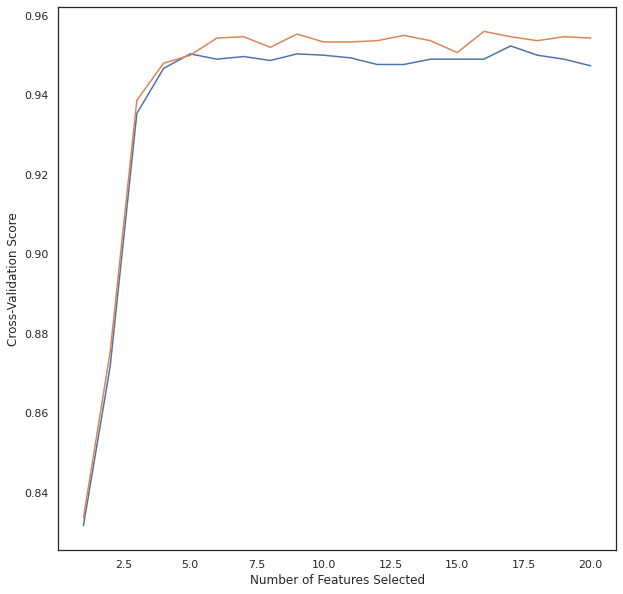

In [ ]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.xlabel("Number of Features Selected")
plt.ylabel("Cross-Validation Score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Using this approach, we have got the optimal number of features as 17 and the best features are listed in the figure above. Now, we plot the results as below with number of features selected on the x-axis and cross-validation score on the y-axis.

Finally, we can see that the Precision and F1-score of class-1 improved very well 0.96 and 0.81 respectively. 

In [ ]:
# Now you can use the rfecv to make new predictions. 
# For example, check the performance on your test set.    
y_true, y_pred = y_test , rfecv.predict(x_test)

# Confustion Matrix
from sklearn.metrics import f1_score,confusion_matrix
cm = confusion_matrix(y_true,y_pred)
print('Confusion Matrix:\n', cm, '\n')
#sns.heatmap(cm,annot=True,fmt="d", annot_kws={"size": 12}) # font size

# Classification Report
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Confusion Matrix:
 [[1741    8]
 [  74  176]] 

Results on the test set:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1749
           1       0.96      0.70      0.81       250

    accuracy                           0.96      1999
   macro avg       0.96      0.85      0.89      1999
weighted avg       0.96      0.96      0.96      1999



      #Conclusion- 
Water Quality dataset is a dataset that is sparse, needed normalization and has a high class-imbalance. Have built a model which has the best F1-score to deal with the class-imbalance and achieved good Precision of 0.96 and Recall of 1.0 for class-0 and 0.70 for class-1 after exploring few feature selection methods. The number of best features are 17 and  we could also know what are they exactly using Recursive Feature Elimination with Cross-Validation.